<a href="https://colab.research.google.com/github/Asvataman/Kaggle-HULL-MarketPrediction/blob/main/ML_Project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House keeping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path = '/content/drive/MyDrive/dataset/HullMarketPrediction/train.csv'

# Imports and Data loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(train_path)

# EDA

In [ ]:
df.head()

,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
0,0,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002421,0.000301,-0.003038
1,1,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008495,0.000303,-0.009114
2,2,0,0,0,1,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009624,0.000301,-0.010243
3,3,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004662,0.000299,0.004046
4,4,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011686,0.000299,-0.012301


In [ ]:
df.columns

Index(['date_id', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'E1',
       'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19',
       'E2', 'E20', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'I1', 'I2', 'I3',
       'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'M1', 'M10', 'M11', 'M12', 'M13',
       'M14', 'M15', 'M16', 'M17', 'M18', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7',
       'M8', 'M9', 'P1', 'P10', 'P11', 'P12', 'P13', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'S1', 'S10', 'S11', 'S12', 'S2', 'S3', 'S4',
       'S5', 'S6', 'S7', 'S8', 'S9', 'V1', 'V10', 'V11', 'V12', 'V13', 'V2',
       'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'forward_returns',
       'risk_free_rate', 'market_forward_excess_returns'],
      dtype='object')

In [ ]:
df.shape

(9021, 98)

In [ ]:
df.dtypes

,0
date_id,int64
D1,int64
D2,int64
D3,int64
D4,int64
...,...
V8,float64
V9,float64
forward_returns,float64
risk_free_rate,float64


In [ ]:
df.isnull().sum()

,0
date_id,0
D1,0
D2,0
D3,0
D4,0
...,...
V8,1006
V9,4539
forward_returns,0
risk_free_rate,0


In [ ]:
missing_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
missing_pct[missing_pct > 0]

,0
E7,77.253076
V10,67.054650
S3,63.551713
M1,61.489857
M13,61.412260
...,...
P9,11.151757
P8,11.151757
V8,11.151757
V6,11.151757


In [ ]:
feature_prefixes = ['M', 'E', 'I', 'P', 'V', 'S', 'MOM', 'D']
feature_counts = {}

for prefix in feature_prefixes:
    cols = [col for col in df.columns if col.startswith(prefix)]
    feature_counts[prefix] = len(cols)

feature_counts

{'M': 18, 'E': 20, 'I': 9, 'P': 13, 'V': 13, 'S': 12, 'MOM': 0, 'D': 9}

In [ ]:
df['market_forward_excess_returns'].describe()

,market_forward_excess_returns
count,9021.000000
mean,0.000053
std,0.010558
min,-0.040582
25%,-0.004747
50%,0.000255
75%,0.005479
max,0.040551


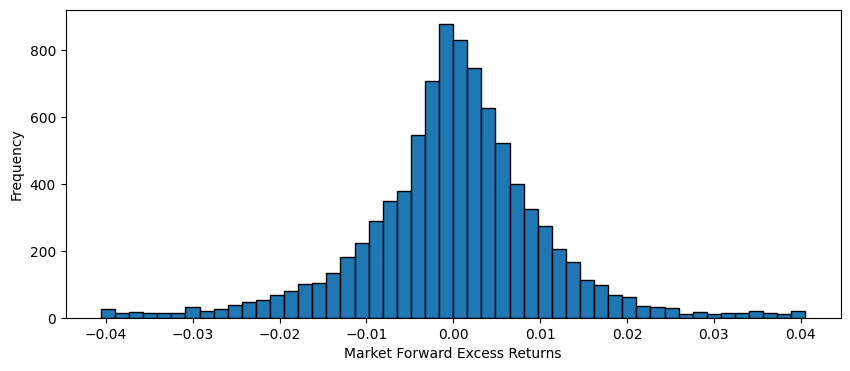

In [ ]:
plt.figure(figsize=(10, 4))
plt.hist(df['market_forward_excess_returns'], bins=50, edgecolor='black')
plt.xlabel('Market Forward Excess Returns')
plt.ylabel('Frequency')
plt.show()

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlations = df[numeric_cols].corrwith(df['market_forward_excess_returns']).sort_values(ascending=False)
correlations.head(20)

,0
market_forward_excess_returns,1.000000
forward_returns,0.999943
V13,0.062395
M1,0.046111
S5,0.040010
D1,0.033946
D2,0.033946
M2,0.033238
V10,0.032635
V7,0.031484


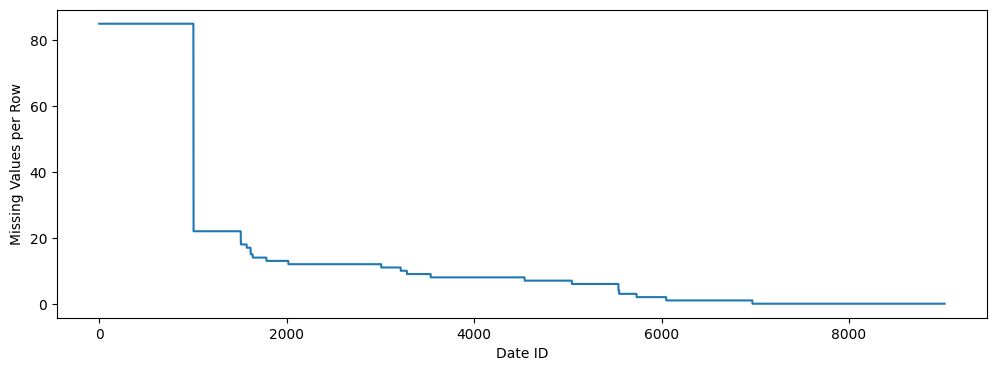

In [ ]:
missing_by_date = df.isnull().sum(axis=1)
plt.figure(figsize=(12, 4))
plt.plot(df['date_id'], missing_by_date)
plt.xlabel('Date ID')
plt.ylabel('Missing Values per Row')
plt.show()

In [ ]:
cutoff = 1000
df_clean = df[df['date_id'] >= cutoff].copy()
print(f"Rows: {len(df_clean)}")
print(f"Max missing per row: {df_clean.isnull().sum(axis=1).max()}")

Rows: 8021
Max missing per row: 85
